In [1]:
from sklearn.model_selection import train_test_split
import os
import random

In [2]:
# Step 1: Split Data

# split training and testing data
audio_dir = "./data_folder/"
emotions = ["angry", "fear", "happy", "sad"]

train_set = {emotion : [] for emotion in emotions}
test_set = {emotion : [] for emotion in emotions}

for emotion in emotions:
    audio_files = os.listdir(os.path.join(audio_dir, emotion))
    # select random audio clips
    random.shuffle(audio_files)
    # split list into train and test
    train_files, test_files = train_test_split(audio_files, train_size=0.7, test_size=0.3)
    # add file paths to corresponding lists for current emotion
    for file in train_files:
        train_set[emotion].append(os.path.join(audio_dir, emotion, file))
    for file in test_files:
        test_set[emotion].append(os.path.join(audio_dir, emotion, file)) 

In [3]:
# Step 2: Exploratory Data Analysis

# label distribution
train_label_counts = {emotion: len(train_set[emotion]) for emotion in emotions}
test_label_counts = {emotion: len(test_set[emotion]) for emotion in emotions}
print("Training label counts:", train_label_counts)
print("Testing label counts:", test_label_counts)

Training label counts: {'angry': 70, 'fear': 70, 'happy': 70, 'sad': 70}
Testing label counts: {'angry': 30, 'fear': 30, 'happy': 30, 'sad': 30}


In [4]:
# load sample audio for each emotion
import librosa
import IPython.display as ipd

In [5]:
# Angry
file_path = train_set['angry'][0]
y, sr = librosa.load(file_path)
print("Angry: ")
ipd.Audio(y, rate=sr)

Angry: 


In [6]:
# Fear
file_path = train_set['fear'][0]
y, sr = librosa.load(file_path)
print("Fear: ")
ipd.Audio(y, rate=sr)

Fear: 


In [7]:
# Happy
file_path = train_set['happy'][0]
y, sr = librosa.load(file_path)
print("Happy: ")
ipd.Audio(y, rate=sr)

Happy: 


In [8]:
# Sad
file_path = train_set['sad'][0]
y, sr = librosa.load(file_path)
print("Sad: ")
ipd.Audio(y, rate=sr)

Sad: 


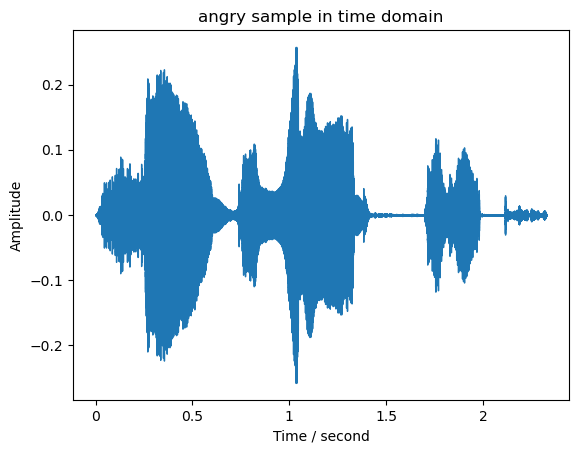

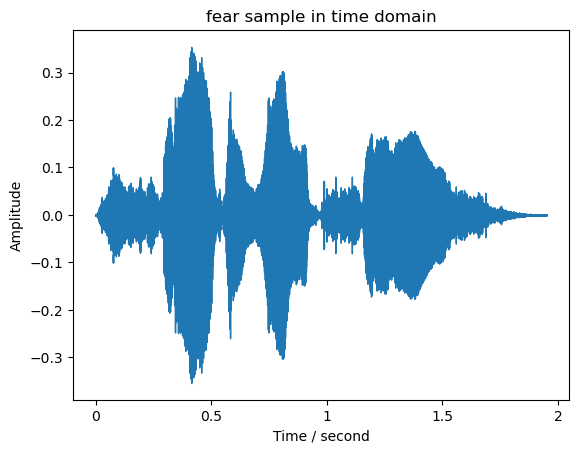

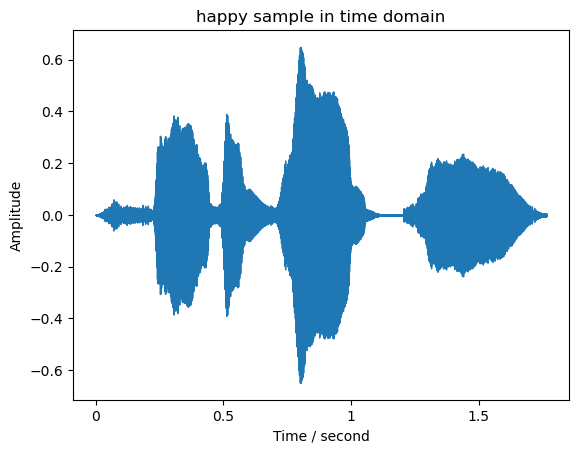

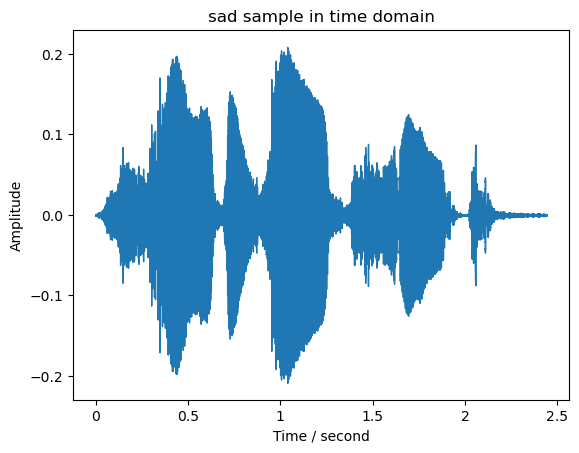

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# plot audio in time domain
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[f'{emotion}'][0])
    plt.figure(1)
    plt.title(f'{emotion} sample in time domain')
    librosa.display.waveshow(y=signal, sr=sample_rate)
    plt.xlabel('Time / second')
    plt.ylabel('Amplitude')
    plt.show()

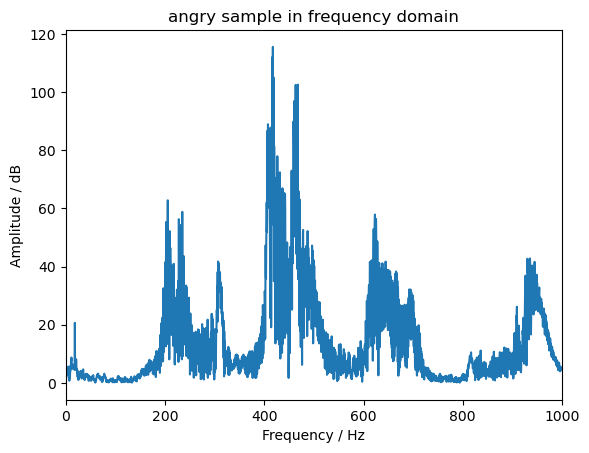

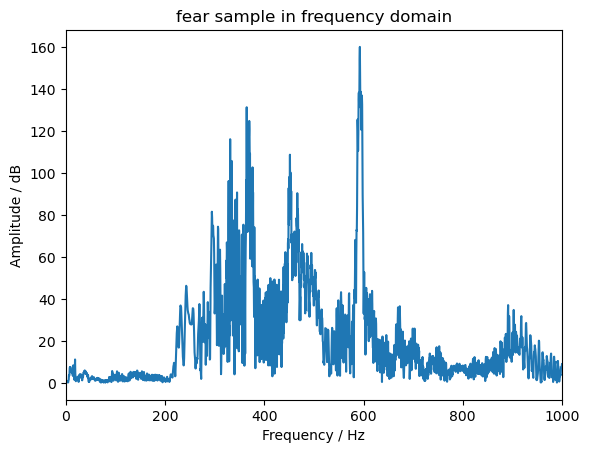

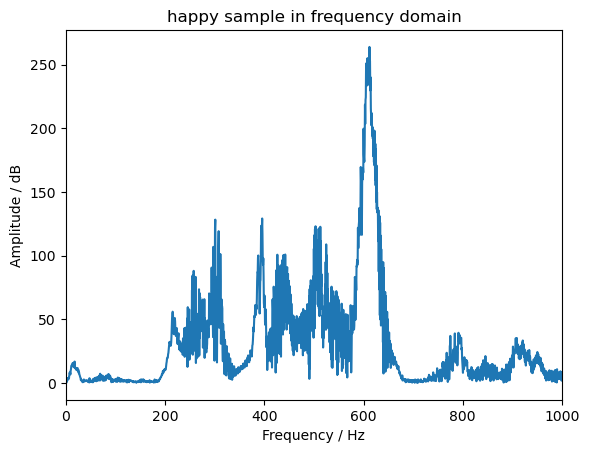

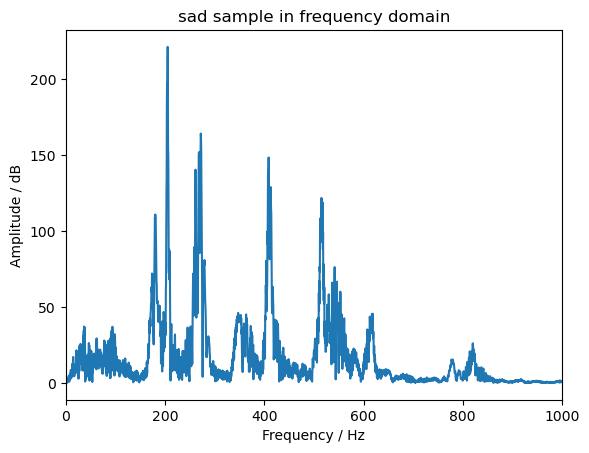

In [10]:
# plot audio in frequency domain
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[f'{emotion}'][0])
    k = np.arange(len(signal))
    T = len(signal)/sample_rate
    freq = k / T
    
    DATA_0 = np.fft.fft(signal)
    abs_DATA_0 = abs(DATA_0)
    plt.figure(2)
    plt.plot(freq, abs_DATA_0)
    plt.title(f"{emotion} sample in frequency domain")
    plt.xlabel("Frequency / Hz")
    plt.ylabel("Amplitude / dB")
    plt.xlim([0, 1000])
    plt.show()

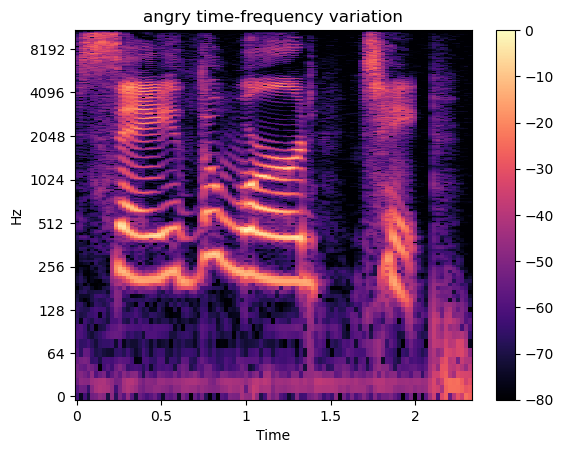

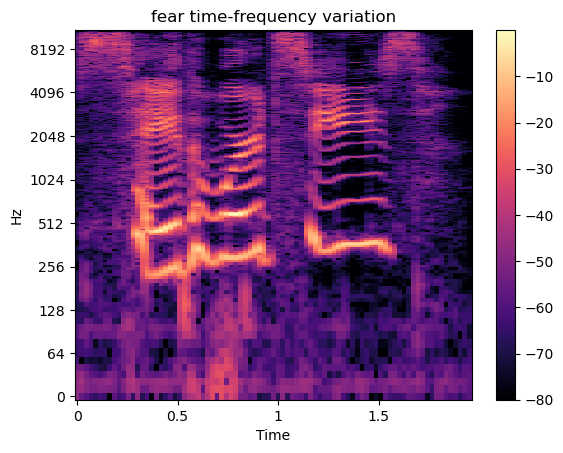

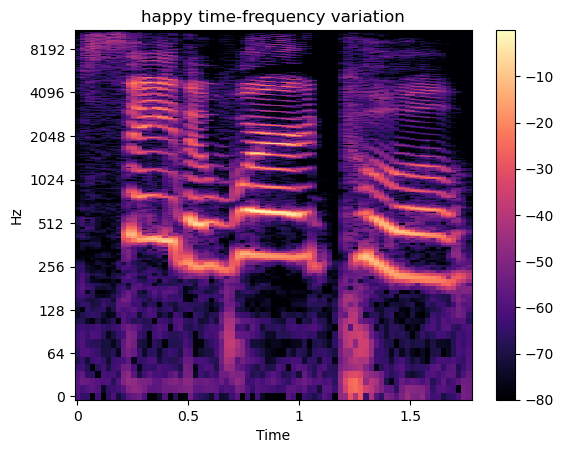

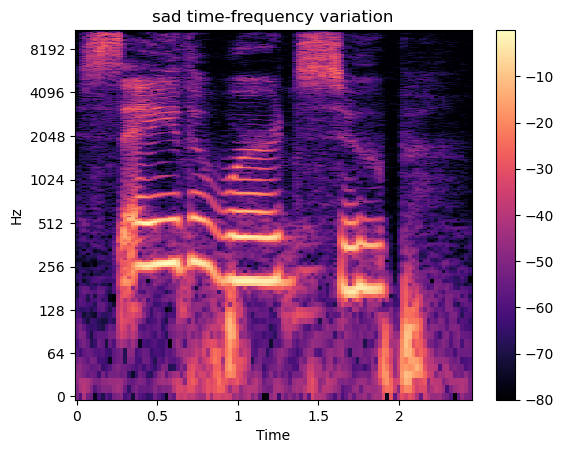

In [11]:
# plot time-frequency variation of sample audio 
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[f'{emotion}'][0])
    D = librosa.stft(signal)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    plt.figure(3)
    librosa.display.specshow(S_db, x_axis='time', y_axis='log')
    plt.colorbar()
    plt.title(f'{emotion} time-frequency variation')
    plt.show()

[0.00136718 0.00519152 0.00898301 0.01116933 0.01290912 0.01602586
 0.01682581 0.01485553 0.01369917 0.01326962 0.01724257 0.04013127
 0.05020299 0.04186823 0.03852138 0.03431932 0.03095715 0.02921895
 0.02871138 0.03025429 0.0318738  0.03084553 0.02603641 0.02040975
 0.01747095 0.01523461 0.01077141 0.00828855 0.00676505 0.00447039
 0.00271251 0.00333862 0.01052603 0.01999931 0.02237414 0.02416157
 0.02047987 0.01349989 0.01136565 0.01101663 0.0116334  0.01457037
 0.02719961 0.04690463 0.0579776  0.05144911 0.03972779 0.04372308
 0.04302508 0.0361746  0.03264384 0.03244254 0.03354784 0.03602449
 0.03822689 0.03458646 0.03350224 0.02817197 0.0137165  0.00873323
 0.00700257 0.00294751 0.0007474  0.00061089 0.0005548  0.0005269
 0.0004468  0.0003411  0.00036336 0.00030357 0.00032826 0.00040329
 0.00058847 0.00630089 0.01411355 0.021183   0.02322956 0.01571998
 0.01005509 0.0122655  0.01734552 0.01959172 0.01738081 0.01376898
 0.00936741 0.00539725 0.00183378 0.00034615 0.00025782 0.00027

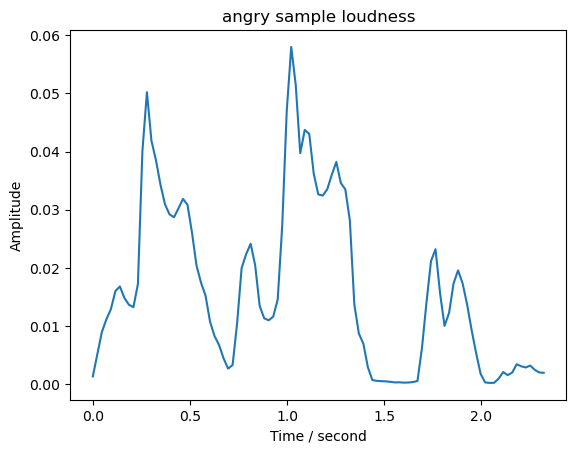

[0.00221085 0.00637832 0.01116481 0.01783079 0.01946734 0.01490804
 0.01269433 0.01258582 0.01335141 0.01270802 0.01336679 0.01191766
 0.01810627 0.04076698 0.04697145 0.04867989 0.04647197 0.05776439
 0.07112917 0.07024013 0.06329117 0.0525143  0.02986302 0.01289758
 0.02336454 0.04584079 0.04761697 0.03762138 0.02461941 0.01589372
 0.01799295 0.0319457  0.05293739 0.06957384 0.07967807 0.07257571
 0.05076516 0.039496   0.0389479  0.03446804 0.01641479 0.00546114
 0.00542815 0.009768   0.0116609  0.01141724 0.01164957 0.01208737
 0.01335128 0.01361569 0.03402302 0.04334965 0.03376766 0.03065611
 0.03000215 0.03047523 0.03652814 0.04160302 0.04265832 0.04254748
 0.04068222 0.03813321 0.03721935 0.03567284 0.03286549 0.0266386
 0.01707495 0.0118987  0.01173695 0.01043293 0.00927106 0.00985818
 0.00848964 0.00544014 0.00362052 0.00323644 0.00283002 0.00193525
 0.00136869 0.00094361 0.00069075 0.00048457 0.00035465 0.00029844
 0.00022188]
Empty DataFrame
Columns: []
Index: []


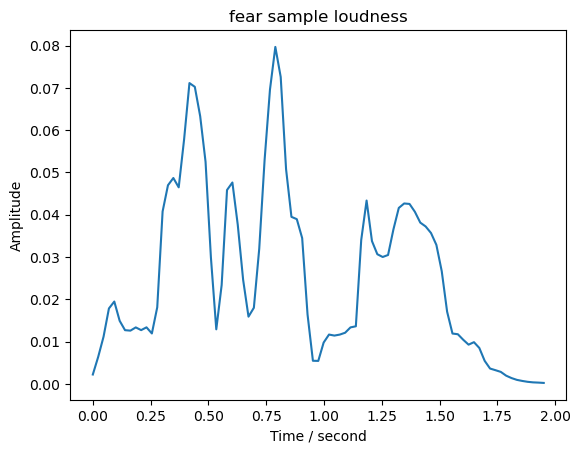

[0.00084065 0.00333653 0.00729085 0.01072156 0.00898667 0.00778387
 0.00785634 0.00675611 0.00664225 0.01239955 0.04506666 0.06683498
 0.07026775 0.07589277 0.07499035 0.07361202 0.07323377 0.06697487
 0.05971762 0.0390278  0.01447174 0.03282995 0.07303386 0.08056033
 0.06594837 0.04216606 0.02684323 0.01993078 0.01415394 0.01127835
 0.01225367 0.02782834 0.05157807 0.08946071 0.14195587 0.15923684
 0.1434796  0.13174396 0.12604009 0.12298159 0.11814202 0.1077525
 0.0912173  0.06017347 0.02950676 0.01906824 0.00933222 0.00437803
 0.00166635 0.00036822 0.0001877  0.00164287 0.00546142 0.00970034
 0.01556639 0.02976131 0.04785313 0.05373325 0.05556421 0.05603136
 0.05568325 0.05693885 0.05602561 0.05096608 0.045673   0.04192894
 0.03959822 0.03767247 0.03536798 0.03124377 0.02544698 0.01969704
 0.01417836 0.0096133  0.00655827 0.00393498 0.00171047]
Empty DataFrame
Columns: []
Index: []


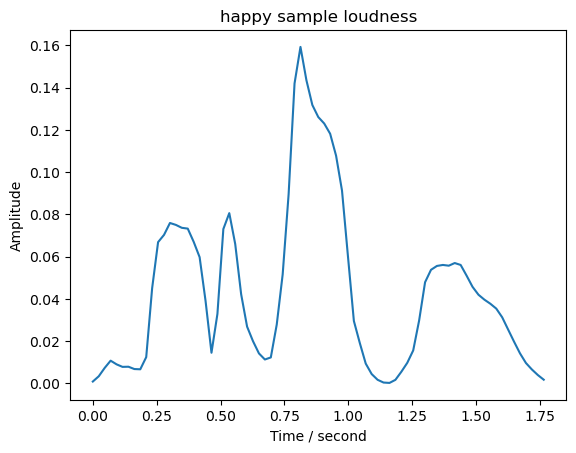

[0.0003893  0.00109321 0.00277868 0.00484981 0.00635681 0.0096754
 0.0149014  0.01536919 0.01296959 0.01115013 0.01151325 0.01127067
 0.01491265 0.02169667 0.02237258 0.02719717 0.03212194 0.04084762
 0.0477258  0.05170759 0.04908141 0.04245938 0.03914606 0.03919634
 0.04124006 0.04426225 0.04285643 0.0291207  0.01049642 0.00484389
 0.01645404 0.03490689 0.03965096 0.03424924 0.0276404  0.02178609
 0.01581851 0.01171161 0.01043139 0.01120803 0.01859838 0.03357342
 0.04353843 0.04759604 0.04756076 0.04633839 0.04422378 0.04199135
 0.04036081 0.03925062 0.03847206 0.03796487 0.03773158 0.03533082
 0.0238541  0.01094859 0.00760439 0.00626519 0.00384746 0.00487838
 0.0106013  0.01213307 0.01232718 0.01422079 0.01391463 0.01244847
 0.01160146 0.01173213 0.01398211 0.01520665 0.01506343 0.02241631
 0.03171192 0.03538845 0.03546092 0.03441267 0.03276277 0.0287957
 0.02553184 0.02333726 0.02106826 0.0159501  0.01099843 0.0076718
 0.00315377 0.00093014 0.00128055 0.01072962 0.02261894 0.0198280

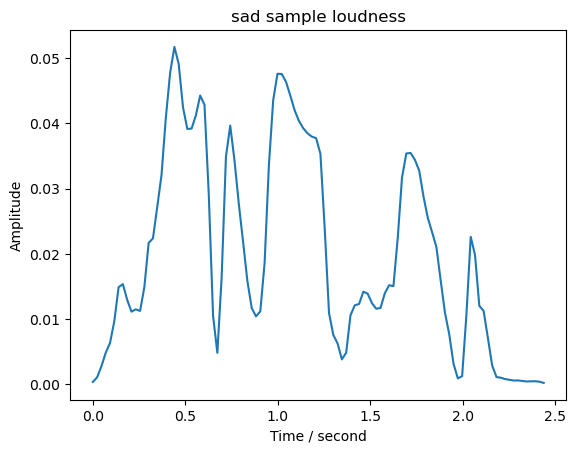

In [21]:
# Step 3: Acoustic Feature Extraction
import pandas as pd

loudness_dict = {emotion : pd.DataFrame() for emotion in emotions}

# extract loudness
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[f'{emotion}'][0])
    df_loudness = pd.DataFrame()
    S, phase = librosa.magphase(librosa.stft(signal))
    rms = librosa.feature.rms(S=S)
    print(rms[0])
    loudness_dfs[emotion]['Loudness'] = rms[0]
    print(df_loudness.head(5))
    plt.figure(3)
    times = librosa.times_like(rms)
    plt.plot(times, rms[0])
    plt.title(f'{emotion} sample loudness')
    plt.xlabel("Time / second")
    plt.ylabel("Amplitude")
    plt.show()

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -549.823486 -461.439789 -425.573822 -413.764191 -399.735504 -380.604797   
1   35.790474  -10.051025  -52.533180  -75.876167  -76.164001  -83.015717   
2   14.506820   34.280190   53.956654   59.739979   57.316814   61.056885   
3   19.867237   19.682697   14.546623   -3.051253  -19.179018  -28.893402   
4   -7.682630   -6.209317   -7.602431   -5.131367    0.991469    0.689663   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -367.514526 -384.756805 -406.345917 -407.850586 -404.446808 -333.110474  
1  -88.668091  -91.772415 -100.333511  -94.309479  -79.572441  -10.921163  
2   70.326775   73.042702   66.230644   63.928051   84.192474  109.507843  
3  -26.467125  -24.741928  -24.863176  -23.863268  -14.070642    6.124238  
4    7.968943   18.552967   22.763990   21.818466   26.675344   33.715424  


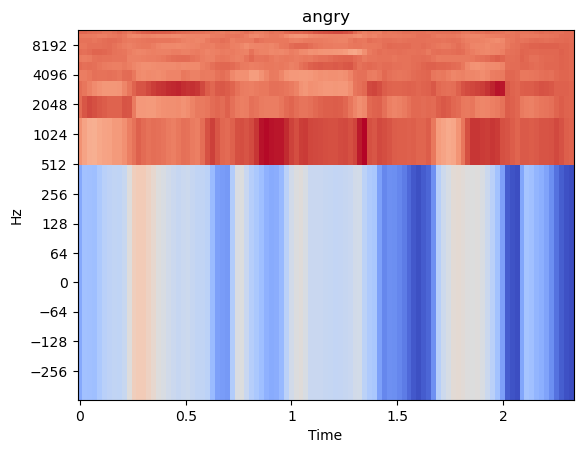

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -549.823486 -461.439789 -425.573822 -413.764191 -399.735504 -380.604797   
1   35.790474  -10.051025  -52.533180  -75.876167  -76.164001  -83.015717   
2   14.506820   34.280190   53.956654   59.739979   57.316814   61.056885   
3   19.867237   19.682697   14.546623   -3.051253  -19.179018  -28.893402   
4   -7.682630   -6.209317   -7.602431   -5.131367    0.991469    0.689663   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -367.514526 -384.756805 -406.345917 -407.850586 -404.446808 -333.110474  
1  -88.668091  -91.772415 -100.333511  -94.309479  -79.572441  -10.921163  
2   70.326775   73.042702   66.230644   63.928051   84.192474  109.507843  
3  -26.467125  -24.741928  -24.863176  -23.863268  -14.070642    6.124238  
4    7.968943   18.552967   22.763990   21.818466   26.675344   33.715424  


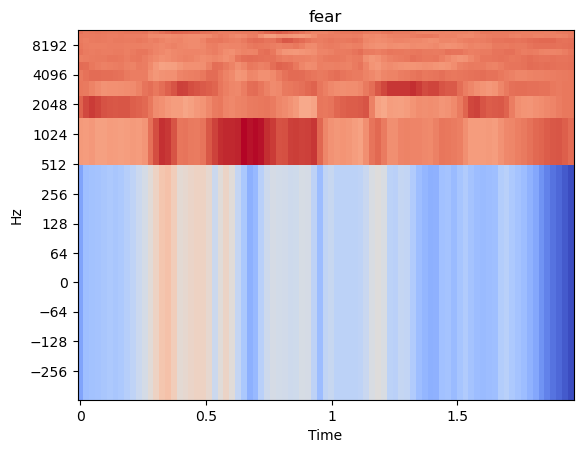

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -549.823486 -461.439789 -425.573822 -413.764191 -399.735504 -380.604797   
1   35.790474  -10.051025  -52.533180  -75.876167  -76.164001  -83.015717   
2   14.506820   34.280190   53.956654   59.739979   57.316814   61.056885   
3   19.867237   19.682697   14.546623   -3.051253  -19.179018  -28.893402   
4   -7.682630   -6.209317   -7.602431   -5.131367    0.991469    0.689663   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -367.514526 -384.756805 -406.345917 -407.850586 -404.446808 -333.110474  
1  -88.668091  -91.772415 -100.333511  -94.309479  -79.572441  -10.921163  
2   70.326775   73.042702   66.230644   63.928051   84.192474  109.507843  
3  -26.467125  -24.741928  -24.863176  -23.863268  -14.070642    6.124238  
4    7.968943   18.552967   22.763990   21.818466   26.675344   33.715424  


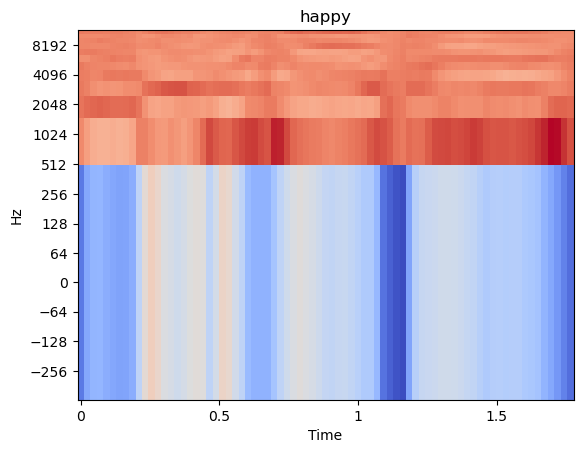

       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -549.823486 -461.439789 -425.573822 -413.764191 -399.735504 -380.604797   
1   35.790474  -10.051025  -52.533180  -75.876167  -76.164001  -83.015717   
2   14.506820   34.280190   53.956654   59.739979   57.316814   61.056885   
3   19.867237   19.682697   14.546623   -3.051253  -19.179018  -28.893402   
4   -7.682630   -6.209317   -7.602431   -5.131367    0.991469    0.689663   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10     MFCC_11     MFCC_12  
0 -367.514526 -384.756805 -406.345917 -407.850586 -404.446808 -333.110474  
1  -88.668091  -91.772415 -100.333511  -94.309479  -79.572441  -10.921163  
2   70.326775   73.042702   66.230644   63.928051   84.192474  109.507843  
3  -26.467125  -24.741928  -24.863176  -23.863268  -14.070642    6.124238  
4    7.968943   18.552967   22.763990   21.818466   26.675344   33.715424  


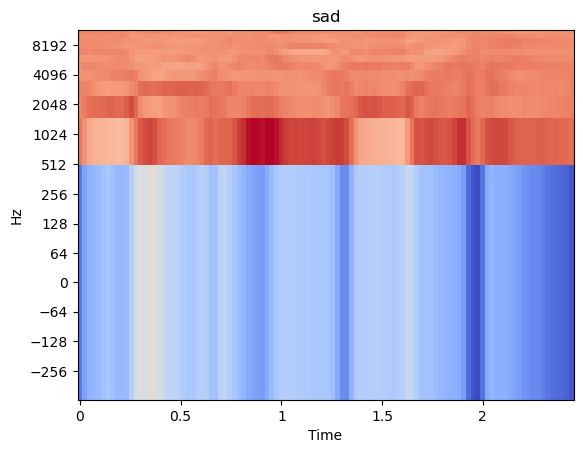

In [20]:
# mel-frequency cepstral coefficients

mfccs_dict = {emotion: pd.DataFrame() for emotion in emotions}
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[emotion][0])
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=12)
    for n_mfcc in range(len(mfccs)):
        mfccs_dict[emotion]['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]
    print(df_mfccs.head(5))
    plt.figure(4)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time', y_axis='log')
    plt.title(emotion)
    plt.show()

        ZCR
0  0.268555
1  0.458496
2  0.655762
3  0.732910
4  0.775391


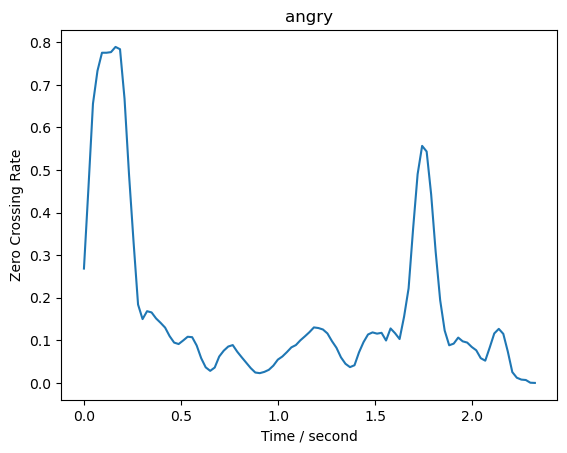

        ZCR
0  0.291016
1  0.490723
2  0.693848
3  0.791992
4  0.813477


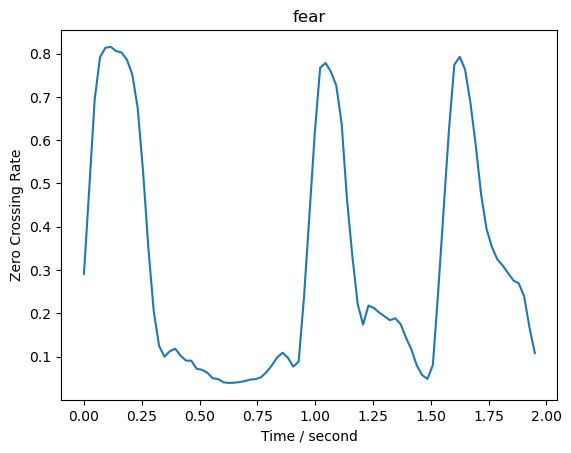

        ZCR
0  0.258301
1  0.440430
2  0.624023
3  0.735840
4  0.772461


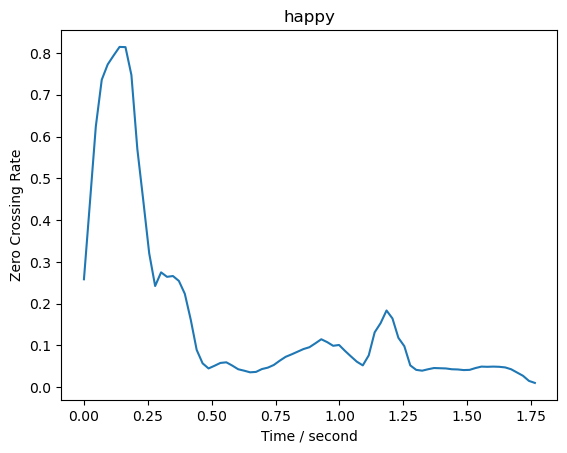

        ZCR
0  0.164551
1  0.319336
2  0.498535
3  0.634766
4  0.698242


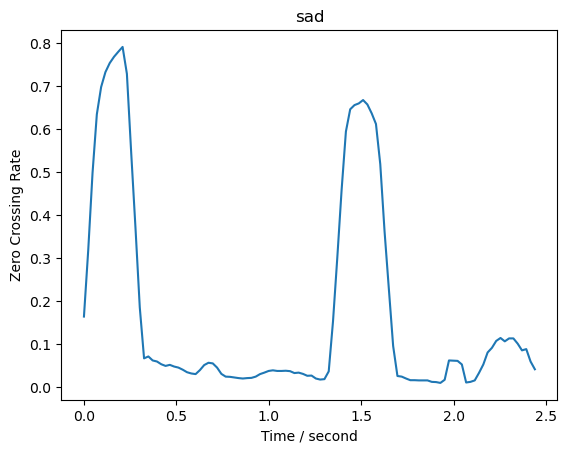

In [29]:
# zero crossing rate
zcr_dict = {emotion : pd.DataFrame() for emotion in emotions}
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[emotion][0])
    zcr = librosa.feature.zero_crossing_rate(y=signal)
    df_zcr = pd.DataFrame(zcr.T, columns=['ZCR'])
    print(df_zcr.head(5))
    plt.title(emotion)
    times = librosa.times_like(zcr)
    plt.plot(times, zcr[0])
    plt.xlabel("Time / second")
    plt.ylabel("Zero Crossing Rate")
    plt.show()

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  0.539731  0.671941  0.938194  0.847427  0.956688  0.712906  0.487629   
1  0.731442  0.797099  0.914627  1.000000  1.000000  1.000000  1.000000   
2  0.549426  0.564518  0.611167  0.934362  0.901917  0.929221  0.923040   
3  0.270868  0.319394  0.530455  0.892306  0.547485  0.455570  0.439690   
4  0.278208  0.226810  0.347414  0.581497  0.445962  0.525329  0.476587   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.414780  0.647000   0.503237   1.000000   0.654260  
1  1.000000  1.000000   1.000000   0.386189   0.134223  
2  0.891381  0.948544   0.615431   0.133445   0.023754  
3  0.453468  0.477933   0.321025   0.066451   0.008445  
4  0.323362  0.511675   0.426652   0.056156   0.003083  


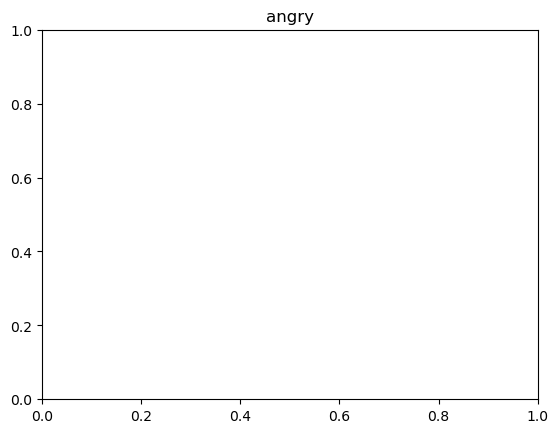

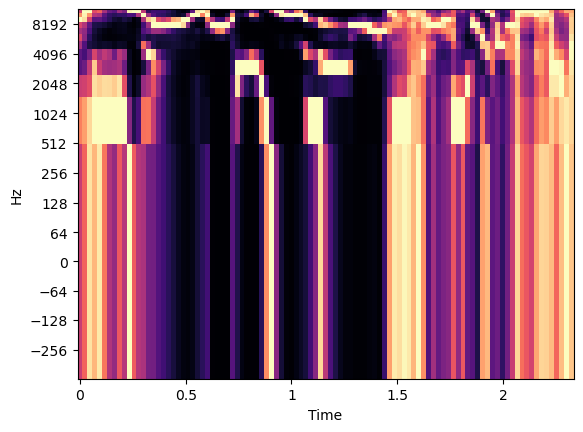

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  0.749907  0.464358  0.572198  0.371341  0.341734  0.397517  0.492327   
1  1.000000  0.779388  0.835103  0.860771  1.000000  1.000000  1.000000   
2  0.831373  1.000000  1.000000  1.000000  0.824488  0.851554  0.775370   
3  0.596722  0.852309  0.543011  0.205858  0.200846  0.399512  0.540932   
4  0.530463  0.366796  0.236142  0.067993  0.075766  0.145966  0.175391   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.510551  0.438351   0.419988   0.654391   0.848270  
1  1.000000  1.000000   1.000000   1.000000   0.945135  
2  0.854834  0.576975   0.464432   0.445135   0.500515  
3  0.555057  0.440764   0.473236   0.385662   0.299976  
4  0.174293  0.201052   0.264262   0.242116   0.265697  


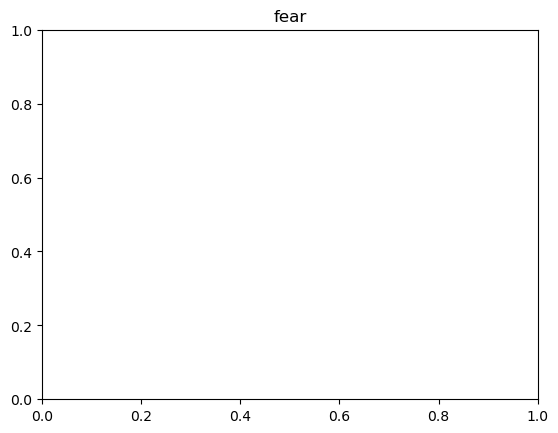

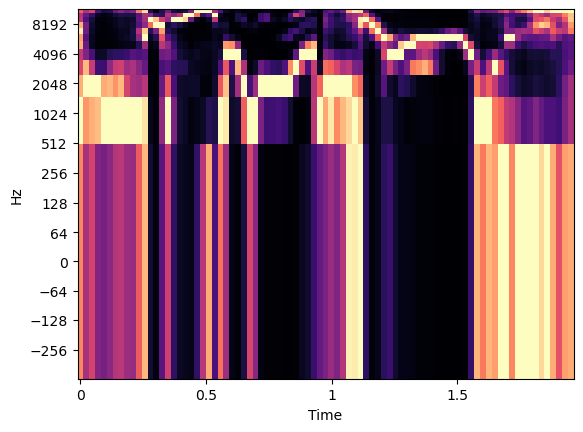

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  0.289083  0.206573   
1  0.616823  0.668216  0.720730  0.781190  0.969351  0.606226  0.426216   
2  0.400157  0.512344  0.441105  0.426307  0.817312  1.000000  1.000000   
3  0.294528  0.258013  0.244491  0.222806  0.568496  0.597247  0.822857   
4  0.399805  0.218728  0.135200  0.141547  0.688322  0.544428  0.475002   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.248900  0.220378   0.059519   0.057452   0.166372  
1  0.409304  0.406964   0.047477   0.074704   0.227176  
2  1.000000  1.000000   0.073358   0.069194   0.309740  
3  0.898252  0.795757   0.061051   0.060005   0.332064  
4  0.642343  0.524734   0.039863   0.022068   0.075239  


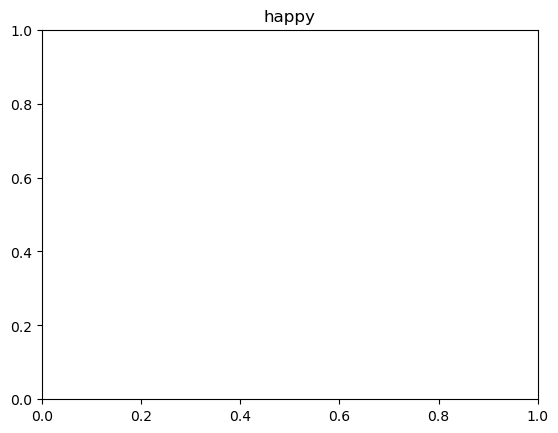

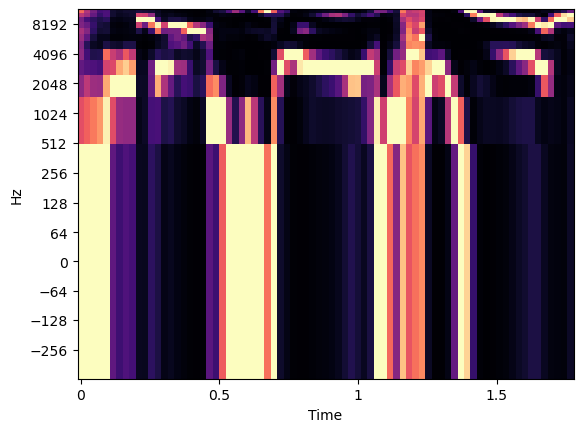

   Chroma_1  Chroma_2  Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  \
0  1.000000  0.750368  0.865621  0.620350  0.721967  0.837679  0.913964   
1  0.900102  0.685475  0.883376  1.000000  1.000000  1.000000  1.000000   
2  0.593024  0.534749  0.621538  0.540954  0.778427  0.938784  0.601623   
3  0.462579  0.399365  0.480710  0.429518  0.532058  0.587516  0.266301   
4  0.479931  0.466271  0.512516  0.388169  0.361043  0.497952  0.262084   

   Chroma_8  Chroma_9  Chroma_10  Chroma_11  Chroma_12  
0  0.693653  0.598757   0.384130   0.412899   0.455840  
1  1.000000  1.000000   0.796846   0.725703   0.752423  
2  0.610029  0.829567   1.000000   1.000000   0.951468  
3  0.284580  0.508077   0.459138   0.649390   1.000000  
4  0.165567  0.242853   0.230402   0.338123   0.569366  


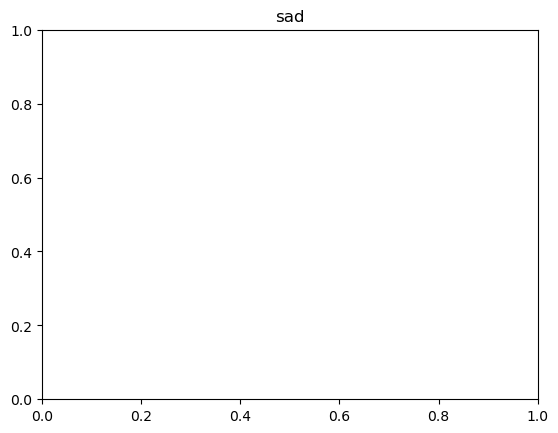

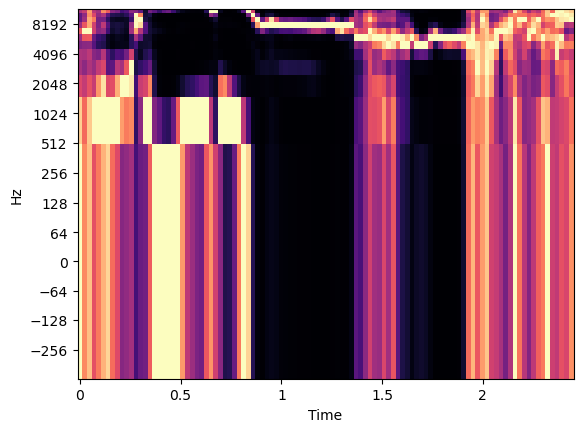

In [102]:
# chroma
chroma_dict = {emotion : pd.DataFrame() for emotion in emotions}
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[emotion][0])
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate)
    for n_chroma in range(len(chromagram)):
        chroma_dict[emotion]['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]
    print(chroma_dict[emotion].head(5))
    plt.title(emotion)
    plt.figure(7)
    librosa.display.specshow(chromagram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()

   Mel_spectrogram_1  Mel_spectrogram_2  Mel_spectrogram_3  Mel_spectrogram_4  \
0           0.000047           0.000073           0.000066           0.000050   
1           0.000090           0.000179           0.000066           0.000022   
2           0.000028           0.000071           0.000057           0.000046   
3           0.000058           0.000093           0.000062           0.000145   
4           0.000030           0.000049           0.000033           0.000057   

   Mel_spectrogram_5  Mel_spectrogram_6  Mel_spectrogram_7  Mel_spectrogram_8  \
0           0.000077           0.000103           0.000121           0.000146   
1           0.000045           0.000089           0.000113           0.000705   
2           0.000240           0.001285           0.002127           0.001295   
3           0.000620           0.001480           0.001573           0.001845   
4           0.000168           0.000260           0.000455           0.000697   

   Mel_spectrogram_9  Mel_

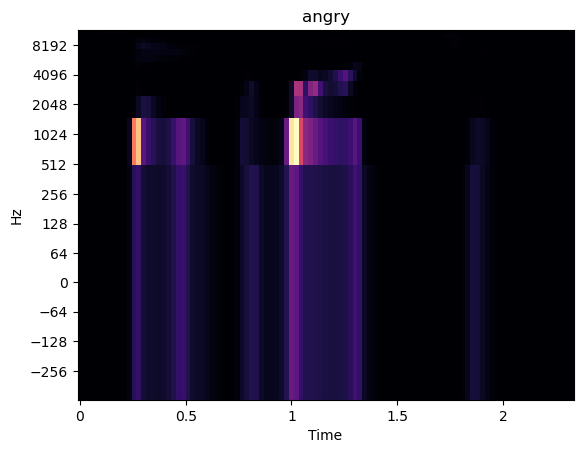

   Mel_spectrogram_1  Mel_spectrogram_2  Mel_spectrogram_3  Mel_spectrogram_4  \
0           0.000200           0.001702           0.003268           0.000840   
1           0.000087           0.000744           0.001429           0.000981   
2           0.000039           0.000081           0.000207           0.000206   
3           0.000066           0.000111           0.000107           0.000177   
4           0.000058           0.000136           0.000164           0.000184   

   Mel_spectrogram_5  Mel_spectrogram_6  Mel_spectrogram_7  Mel_spectrogram_8  \
0           0.000353           0.000488           0.000483           0.000499   
1           0.001529           0.001202           0.000625           0.000680   
2           0.000282           0.000379           0.000299           0.000321   
3           0.000395           0.000622           0.000501           0.000698   
4           0.000318           0.000453           0.000450           0.000490   

   Mel_spectrogram_9  Mel_

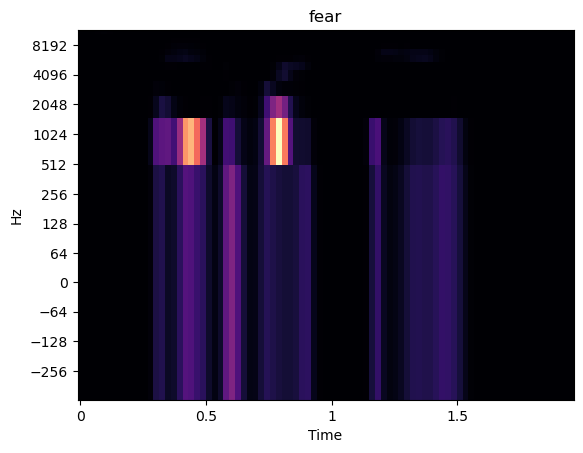

   Mel_spectrogram_1  Mel_spectrogram_2  Mel_spectrogram_3  Mel_spectrogram_4  \
0           0.000313           0.000665           0.000260           0.000194   
1           0.000113           0.000372           0.000289           0.000244   
2           0.000030           0.000134           0.000184           0.000213   
3           0.000025           0.000099           0.000341           0.000360   
4           0.000024           0.000069           0.000137           0.000173   

   Mel_spectrogram_5  Mel_spectrogram_6  Mel_spectrogram_7  Mel_spectrogram_8  \
0           0.000163           0.000134           0.000080           0.000114   
1           0.000084           0.000052           0.000059           0.000082   
2           0.000088           0.000074           0.000070           0.000073   
3           0.000132           0.000201           0.000114           0.000086   
4           0.000174           0.000184           0.000122           0.000078   

   Mel_spectrogram_9  Mel_

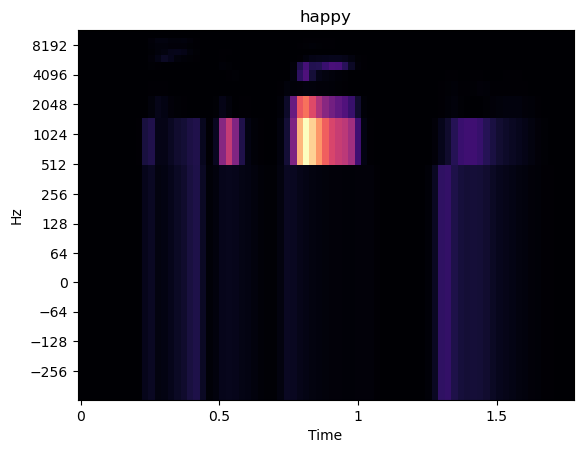

   Mel_spectrogram_1  Mel_spectrogram_2  Mel_spectrogram_3  Mel_spectrogram_4  \
0           0.000106           0.000289           0.000290           0.000161   
1           0.000074           0.000237           0.000418           0.000170   
2           0.000050           0.000071           0.000062           0.000052   
3           0.000021           0.000037           0.000038           0.000057   
4           0.000009           0.000024           0.000024           0.000040   

   Mel_spectrogram_5  Mel_spectrogram_6  Mel_spectrogram_7  Mel_spectrogram_8  \
0           0.000122           0.000111           0.000173           0.000158   
1           0.000105           0.000180           0.000190           0.000111   
2           0.000121           0.000201           0.000166           0.000083   
3           0.000117           0.000185           0.000163           0.000089   
4           0.000060           0.000096           0.000121           0.000077   

   Mel_spectrogram_9  Mel_

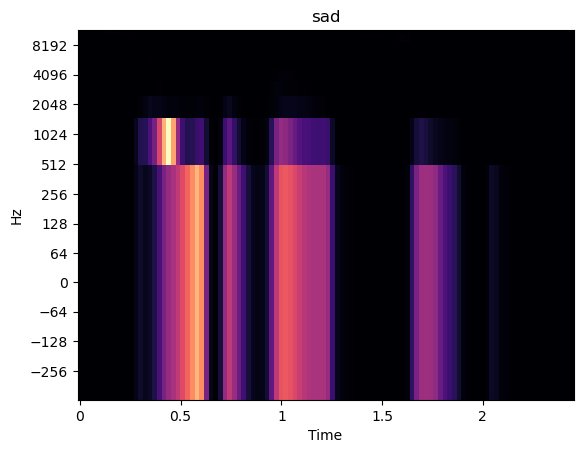

In [34]:
# mel spectrogram
mel_dict = {emotion : pd.DataFrame() for emotion in emotions}
for emotion in emotions:
    signal, sample_rate = librosa.load(train_set[emotion][0])
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        mel_dict[emotion]['Mel_spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]
    print(mel_dict[emotion].head(5))
    plt.figure(8)
    plt.title(emotion)
    librosa.display.specshow(mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.show()

In [47]:
# combine all features
feature_matrix = {}
for emotion in emotions:
    feature_matrix[emotion] = pd.concat([loudness_dict[emotion], mfccs_dict[emotion], zcr_dict[emotion], mel_dict[emotion]], axis=1)
    print(emotion)
    print(feature_matrix[emotion].head(5))
    feature_matrix[emotion].to_csv(f'{emotion}_feature_matrix.csv')

angry
       MFCC_1      MFCC_2      MFCC_3      MFCC_4      MFCC_5      MFCC_6  \
0 -469.822845 -407.745789 -411.145386 -414.488770 -382.895386 -356.201660   
1  -50.430756  -85.276184 -104.268471 -108.498016  -92.271469  -83.235931   
2   17.988277   47.304630   65.271027   55.283226   45.270905   38.589264   
3   11.131329   -1.999771  -18.605221  -38.489960  -51.847694  -60.872139   
4  -12.395124  -13.800999   -3.439407    8.504881    4.562209    4.686903   

       MFCC_7      MFCC_8      MFCC_9     MFCC_10  ...  Mel_spectrogram_3  \
0 -343.416840 -334.657837 -337.954102 -317.847290  ...           0.000066   
1  -79.801506  -65.612045  -64.999977  -46.477524  ...           0.000066   
2   28.752773   28.409069   29.990067   51.481567  ...           0.000057   
3  -60.847313  -58.545681  -57.283867  -28.797371  ...           0.000062   
4    7.330549    3.984612   -1.674670   14.360752  ...           0.000033   

   Mel_spectrogram_4  Mel_spectrogram_5  Mel_spectrogram_6  Mel_spec

In [101]:
# Step 5: Audio Emotion Regcognition Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

svc = SVC(probability=True)
rfc = RandomForestClassifier()
nbc = GaussianNB()

# Combine all feature matrices
X = pd.concat([feature_matrix[emotion] for emotion in emotions])

# Create label vector
y = np.concatenate([[i]*len(feature_matrix[emotion]) for i, emotion in enumerate(emotions)])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.3)

# Train Model
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Test Model with Test Data
y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

# Print results
print("SVC: ")
print(classification_report(y_test, y_svc_predicted, zero_division=1))
print("Gaussian NB: ")
print(classification_report(y_test, y_nbc_predicted, zero_division=1))
print("Random Forest: ")
print(classification_report(y_test, y_rfc_predicted, zero_division=1))

SVC: 
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       0.13      1.00      0.24         2
           2       1.00      0.00      0.00         6
           3       1.00      0.00      0.00         3

    accuracy                           0.13        15
   macro avg       0.78      0.25      0.06        15
weighted avg       0.88      0.13      0.03        15

Gaussian NB: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.00      0.00         2
           2       0.45      0.83      0.59         6
           3       0.67      0.67      0.67         3

    accuracy                           0.47        15
   macro avg       0.53      0.38      0.31        15
weighted avg       0.45      0.47      0.37        15

Random Forest: 
              precision    recall  f1-score   support

           0       0.67      0.50      